In [1]:
from ase.io import read
import numpy as np
from aseMolec import pltProps as pp
from aseMolec import extAtoms as ea
from matplotlib import pyplot as plt

#load the output file
REF_energies = {}
MACE_energies = {}
REF_forces = {}
MACE_forces = {}

for i in range(4):
    dat = read(f"Outputs/prediction{i}_PBE0.xyz", ":") 
    REF_energies[f'REF{i}_energy'] = ea.get_prop(dat, 'info', f'REF{i}_energy', True)
    MACE_energies[f'MACE{i}_energy'] = ea.get_prop(dat, 'info', f'MACE{i}_energy', True)
    REF_forces[f'REF{i}_forces'] = np.concatenate(ea.get_prop(dat, 'arrays', f'REF{i}_forces')).flatten()
    MACE_forces[f'MACE{i}_forces'] = np.concatenate(ea.get_prop(dat, 'arrays', f'MACE{i}_forces')).flatten()
    

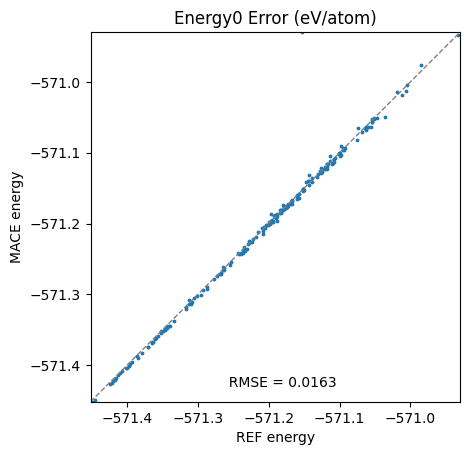

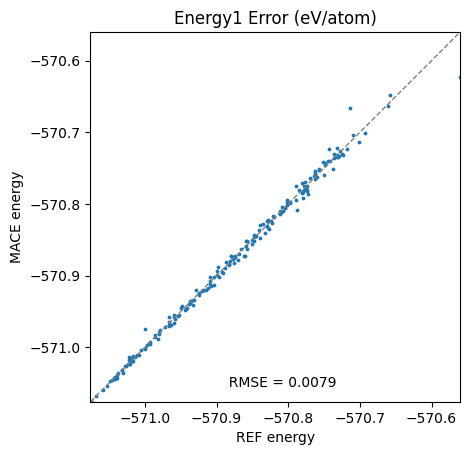

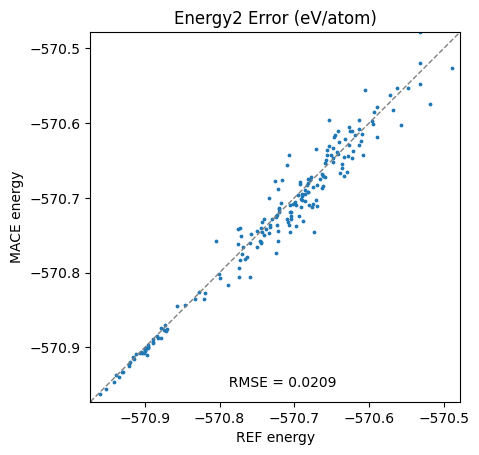

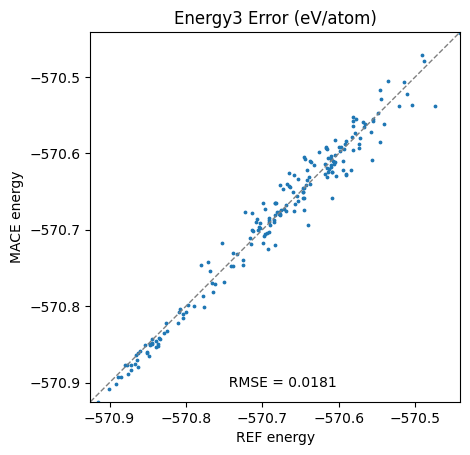

In [2]:
# Correlation plot for real vs predicted energies
figs = []
for i in range (4):
    fig = pp.plot_prop(REF_energies[f'REF{i}_energy'], MACE_energies[f'MACE{i}_energy'], title= f"Energy{i} Error (eV/atom)", labs=["REF energy", "MACE energy"])
    figs.append(fig)
    plt.show()
    
    

In [3]:
from matplotlib import pyplot as plt

# Finding the anomaly conformation
#err = np.abs(REF0_energy - MACE0_energy)
#plt.plot(err)
#idx = np.where(err>0.2)[0][0]


In [4]:
import nglview as nv

# Viewing the anomaly conformation
#nv.show_ase(dat[idx])

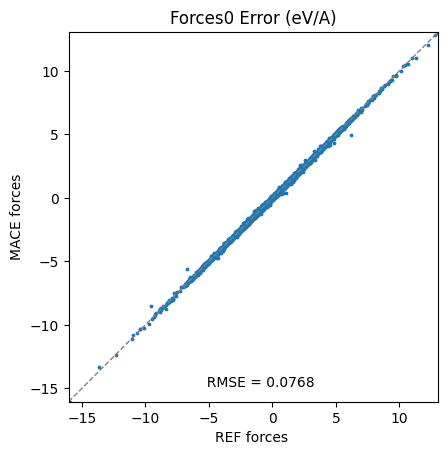

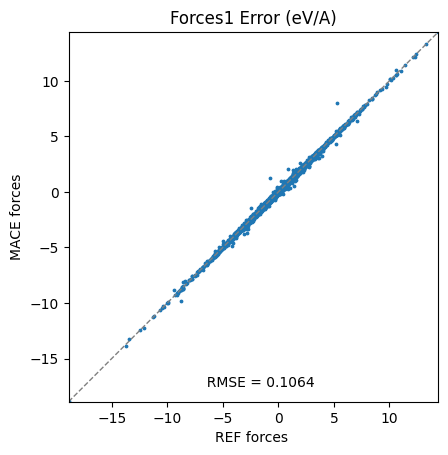

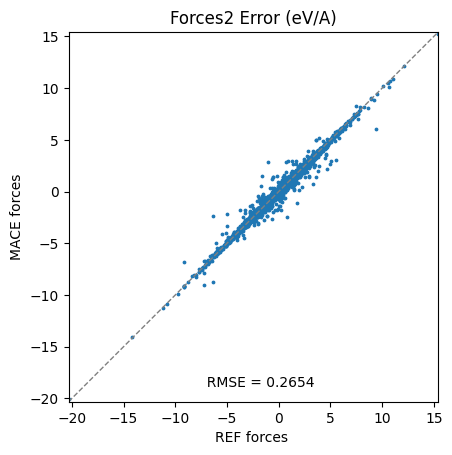

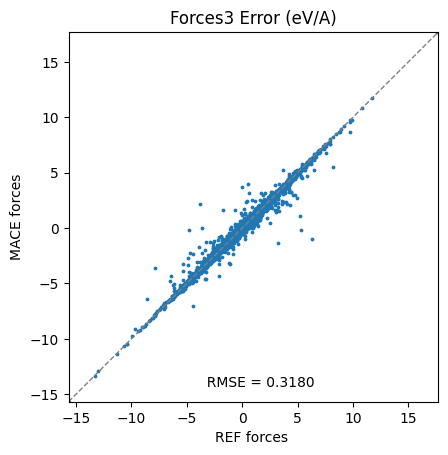

In [5]:
# Correlation plot for real vs predicted forces
figs = []
for i in range(4):
    fig = pp.plot_prop(REF_forces[f'REF{i}_forces'], MACE_forces[f'MACE{i}_forces'], title= f"Forces{i} Error (eV/A)", labs=["REF forces ", "MACE forces"])
    figs.append(fig)
    plt.show()
    